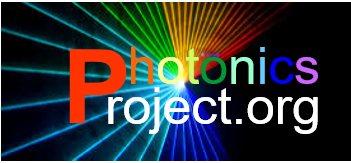
# Function:  Blackbody Emission

In [6]:
%matplotlib inline
from ipywidgets import interact, Layout, widgets
import numpy as np
import matplotlib.pyplot as plt

 ## "Plank Background" section heading and text results
Plank = widgets.HTML(value = "<br><p style='font-size:16pt'><b>Plank Blackbody equation:  Radiant Exitance = M =  εσT^4 </b></p>"
"<b> Where T is the absolute temperature, ε is the emittance (= 1 for blackbody), and σ = 5.670367×10−8 W/m^2⋅K^4 is the Stefan–Boltzmann constant. " 
)

display(Plank)

#rough scale for slider
print("            25  300  750    1500  2000  2500  Kelvin ")
  
def plot_func(NTemp):

        wvl1=3.0
        wvl2=5.0
        
        #define wavelength range and step to equal Modtran plots
        lowl = 1.0
        upl=15.0
        step=0.025
        Temp = abs(NTemp)
        #step out wavelenghts, match array size of L to wvl
        wvl = np.arange(lowl, upl,step)
        LW = wvl*3 #just to setup identical array size the 3 is random
        L = wvl*4  #just to setup identical array size the 4 is rando
        Lsubband = 0.0
        LsubbandW = 0.0

        #compute radiant intensity values L and sub-band total
        count=0
        for i in wvl:
            LW[count]= 37400/(wvl[count]**5)*(1/((2.71828)**(14400/(wvl[count]*Temp))-1))
            L[count]= (1.88e27/(wvl[count]**4))*(1/(np.exp(14388/(wvl[count]*Temp))-1))/10000
            if (wvl[count] > wvl1) and (wvl[count] < wvl2) :
                    Lsubband+=L[count]*step
                    LsubbandW+=LW[count]*step
            #print (count, wvl[count], L[count])
            count +=  1

        #find peak L and index of peak
        peakph=3666/Temp
        mrx = max(L)
        inpeak = np.argmax(L)

        #make a vertical line
        vlinex = np.repeat(wvl[inpeak], 5)
        vliney = vlinex * 3
        count=0
        for i in vlinex:
            vliney[count] = (count/3)*L[inpeak]
            #print (count, vlinex[count], vliney[count])
            count +=1
        #print (vlinex, vliney)

        #sum of radiances
        fullrad=sum(L)*step
        fullradW=sum(LW)*step

        #format for output
        fullrad_d=float("{:.2E}".format(fullrad))
        Lsubband_d=float("{:.2E}".format(Lsubband))
        fullradW_d=float("{:.2E}".format(fullradW))
        LsubbandW_d=float("{:.2E}".format(LsubbandW))
        mrxd=round(mrx,2)
        wvl1d=round(wvl1,2)
        wvl2d=round(wvl2,2)
        wvlpd=round(peakph,2)
        
        #output totals
        #CalcResults = widgets.HTML(value = "<p style='font-size:16pt'><b>Calculated Results:</b>")
        #display(CalcResults) #Displays calculated results message
        #print ("    Temp= %4dK   Exitance= %5.4e ph/sec-cm^2  Sub Band: %4.2f - %4.2f um Exitance = %5.4e ph/sec-cm^2" %(Temp,fullrad_d,wvl1,wvl2,Lsubband_d))
        
                          
        #multi plot 
        plt.style.use('dark_background')
        plt.figure(figsize=(14,10))
            
        #full band plot
        ax1 = plt.subplot(211)
        plt.plot ( wvl, L,color = 'red')
        #plt.grid(True)
        plt.fill_between(wvl, 0, L,color='blue',alpha=1.0)
        plt.plot (wvl[inpeak],L[inpeak],'gv',linewidth=4)
        plt.plot (vlinex,vliney,'g:',linewidth=4)
        #plt.plot (vlinex+.05,vliney,'w:')
        #plt.xlabel('Wavelenght um')
        plt.ylabel('ph/sec-cm^2-um')
        plt.title('Plank Blackbody Curve - Source Emittance T= ' + str(Temp))
        plt.axis([lowl,upl,0, 1.1*mrx])
        plt.text(0.77*upl, L[inpeak],"    " + str(fullrad_d) + " Ph/Sec-cm^2",color='white',fontsize=15)         
        #plt.text(1.02*wvl[inpeak], L[inpeak], "       " + str(wvlpd) + "um",color='green',weight=45,alpha=4.0)
        plt.text(wvl[inpeak], L[inpeak]*-0.15, str(wvlpd) + "um = Peak",color='green',fontsize=12,fontweight='bold')

        def slider_func(wvl1,wvl2):
            
            #print ("Peak Wvl= %5.2f   Exitance= %5.4e Watts/cm^2   Sub Band: %4.2f - %4.2f um Exitance = %5.4e Watt-cm^2" %(wvlpd,fullradW_d,wvl1,wvl2,LsubbandW_d))
                    
            wvl1d=round(wvl1,2)
            wvl2d=round(wvl2,2)
            wvlpd=round(peakph,2)
            Lsubband2=0
            LsubbandW2=0
            count=0
            for j in wvl:
                if (wvl[count] > wvl1) and (wvl[count] < wvl2) :
                    Lsubband2+=L[count]*step
                    LsubbandW2+=LW[count]*step
                count +=  1
            
            Lsubband2_d=float("{:.2e}".format(Lsubband2))
            LsubbandW2_d=float("{:.2e}".format(LsubbandW2))
            
            plt.figure(figsize=(14,10))
            #plot of sub band in log scale
            plt.subplot(212)
            vlinex1 = np.repeat(wvl1, 5)
            vlinex2 = np.repeat(wvl2, 5)
            plt.plot ( wvl, L,'r')
            plt.plot (vlinex1,vliney,'w:', linewidth = 3)
            plt.plot (vlinex2,vliney,'w:', linewidth = 3)
            plt.xticks(np.arange(min(wvl), max(wvl)))#+1, 1.0))
            plt.grid(True)
            plt.xlabel('Wavelenght um')
            plt.ylabel('ph/sec-cm^2-um')
            plt.yscale('log')
            plt.axis([1.0, 15.0,10E-6*max(L),4*max(L)])
            plt.text(wvl1, 0.15*L[inpeak], "  " + str(wvl1d) + " to ", color='white')
            plt.text(wvl2, 0.15*L[inpeak], "  " + str(wvl2d) + "um", color='white')
            plt.fill_between(wvl, 0, L, where = (wvl>wvl1), facecolor='blue',alpha=0.6)
            plt.fill_between(wvl, 0, L, where = (wvl>wvl2), facecolor='black')
            #plt.fill_between(wvl, 0, ML, where = (wvl>=wvl1), facecolor='blue',alpha=0.6)
            #plt.fill_between(wvl, 0, ML, where = (wvl>=wvl2), facecolor='black')
            plt.plot (wvl[inpeak],L[inpeak],'gv',linewidth=4)
            plt.plot (vlinex,vliney,'g:',linewidth=4)
            plt.text(wvl2, 2*L[inpeak], str(Lsubband2_d) + " ph/sec-cm^2",color='White',fontsize=15)

        interact(slider_func,
            wvl1  = widgets.FloatSlider(value=3.0, min=1, max=15, step=0.25,description="WVL1 (um)",layout=Layout(width='900px'),continuous_update=False),
            wvl2  = widgets.FloatSlider(value=5.0, min=1, max=15, step=0.25,description="WVL2 (um)",layout=Layout(width='900px'),continuous_update=False),
                )
        
# Description width style
style1 = {'description_width': 'initial'} 
        
interact(plot_func, 
             NTemp = widgets.FloatSlider(value=300,min=25, max=2500, step=1,description="Temperature (K)",layout=Layout(width='400px'),style=style1,continuous_update=False),
        )


Input temperature (K):333
Input short SPACE long sub-band (microns):2 3
        1000 800 600 400 200 50  Kelvin 


interactive(children=(FloatSlider(value=-333.0, description='NTemp', max=-10.0, min=-1000.0, step=2.0), FloatS…

<function __main__.plot_func(NTemp, wvl1, wvl2)>